# Digital Energy: Data Visualization Using Python

In [204]:
# importing libraries
# data processing
import pandas as pd 
# numerical library 
import numpy as np
# timer, dates
import datetime
# data visualization libraries
import matplotlib
import matplotlib.pyplot as plt 

### Loading Data

In [64]:
Delicado = pd.read_csv('dataModoDelicado.csv', sep=',')
Rapido = pd.read_csv('dataModoQuick.csv', sep=',')
Eco = pd.read_csv('dataModoE.csv', sep=',')

# Añadir nombre columnas columnas
Delicado.columns = ['Time','Irms_A','Prms_W']
Rapido.columns = ['Time','Irms_A','Prms_W']
Eco.columns = ['Time','Irms_A','Prms_W']

### Representation of Data

In [65]:
Delicado.head()

,Time,Irms_A,Prms_W
0,2020-07-29 13:53:40.830088,-0.05,-12.64
1,2020-07-29 13:53:45.839041,-0.05,-11.24
2,2020-07-29 13:53:50.843365,-0.05,-11.93
3,2020-07-29 13:53:55.847694,0.05,11.06
4,2020-07-29 13:54:00.857020,0.08,18.61


In [66]:
Rapido.head()

,Time,Irms_A,Prms_W
0,2020-07-25 21:03:08.583571,0.16,36.84
1,2020-07-25 21:03:13.583817,0.10,21.89
2,2020-07-25 21:03:18.586673,0.11,25.64
3,2020-07-25 21:03:23.603774,0.11,25.30
4,2020-07-25 21:03:28.605422,0.06,14.52


In [67]:
Eco.head()

,Time,Irms_A,Prms_W
0,2020-07-25 19:09:03.927470,-0.02,-5.69
1,2020-07-25 19:09:08.936796,-0.02,-4.01
2,2020-07-25 19:09:13.942124,-0.02,-3.95
3,2020-07-25 19:09:18.946448,-0.01,-3.21
4,2020-07-25 19:09:23.951793,0.02,4.93


In [68]:
Delicado.dtypes

Time       object
Irms_A    float64
Prms_W    float64
dtype: object

In [69]:
Rapido.dtypes

Time       object
Irms_A    float64
Prms_W    float64
dtype: object

In [70]:
Eco.dtypes

Time       object
Irms_A    float64
Prms_W    float64
dtype: object

In [71]:
# Convertir timestamp a datetime en pandas
Delicado['Time'] = pd.to_datetime(Delicado['Time'])
Rapido['Time'] = pd.to_datetime(Rapido['Time'])
Eco['Time'] = pd.to_datetime(Eco['Time'])

In [72]:
Eco.head()

,Time,Irms_A,Prms_W
0,2020-07-25 19:09:03.927470,-0.02,-5.69
1,2020-07-25 19:09:08.936796,-0.02,-4.01
2,2020-07-25 19:09:13.942124,-0.02,-3.95
3,2020-07-25 19:09:18.946448,-0.01,-3.21
4,2020-07-25 19:09:23.951793,0.02,4.93


### Energy calculation

In [73]:
# Cálculo preciso de la energia entre 2 muestras
Delicado['Energy_Wh'] = 0.0
longitud = Delicado['Energy_Wh'].size

# Eliminar valore negativos de Corriente y Potencia
for x in range(0,longitud):
    if Delicado['Irms_A'][x] < 0.0:
        Delicado.at[x,'Irms_A'] = 0.0
    if Delicado['Prms_W'][x] < 0.0:
        Delicado.at[x,'Prms_W'] = 0.0
        
# Hacer un for entre el segundo valor del vector y el último (el primer valor tiene 0 energia al ser el primero)
for x in range(1,longitud):
    # Multiplicamos la potencia por el incremento de tiempo respecto la medición anterior (en horas)
    Delicado.at[x,'Energy_Wh'] = Delicado['Prms_W'][x] * ((Delicado['Time'][x]-Delicado['Time'][x-1]).seconds/3600)
    
Delicado.head()

,Time,Irms_A,Prms_W,Energy_Wh
0,2020-07-29 13:53:40.830088,0.00,0.00,0.000000
1,2020-07-29 13:53:45.839041,0.00,0.00,0.000000
2,2020-07-29 13:53:50.843365,0.00,0.00,0.000000
3,2020-07-29 13:53:55.847694,0.05,11.06,0.015361
4,2020-07-29 13:54:00.857020,0.08,18.61,0.025847


In [266]:
Delicado.tail()

,Time,Irms_A,Prms_W,Energy_Wh
730,2020-07-29 14:54:35.425854,0.0,0.0,0.0
731,2020-07-29 14:54:40.431180,0.0,0.0,0.0
732,2020-07-29 14:54:45.435506,0.0,0.0,0.0
733,2020-07-29 14:54:50.444835,0.0,0.0,0.0
734,2020-07-29 14:54:55.449160,0.0,0.0,0.0


In [74]:
# Cálculo preciso de la energia entre 2 muestras
Rapido['Energy_Wh'] = 0.0
longitud = Rapido['Energy_Wh'].size

# Eliminar valore negativos de Corriente y Potencia
for x in range(0,longitud):
    if Rapido['Irms_A'][x] < 0.0:
        Rapido.at[x,'Irms_A'] = 0.0
    if Rapido['Prms_W'][x] < 0.0:
        Rapido.at[x,'Prms_W'] = 0.0
        
# Hacer un for entre el segundo valor del vector y el último (el primer valor tiene 0 energia al ser el primero)
for x in range(1,longitud):
    # Multiplicamos la potencia por el incremento de tiempo respecto la medición anterior (en horas)
    Rapido.at[x,'Energy_Wh'] = Rapido['Prms_W'][x] * ((Rapido['Time'][x]-Rapido['Time'][x-1]).seconds/3600)
    
Rapido.head()

,Time,Irms_A,Prms_W,Energy_Wh
0,2020-07-25 21:03:08.583571,0.16,36.84,0.000000
1,2020-07-25 21:03:13.583817,0.10,21.89,0.030403
2,2020-07-25 21:03:18.586673,0.11,25.64,0.035611
3,2020-07-25 21:03:23.603774,0.11,25.30,0.035139
4,2020-07-25 21:03:28.605422,0.06,14.52,0.020167


In [267]:
Rapido.tail()

,Time,Irms_A,Prms_W,Energy_Wh
309,2020-07-25 21:28:55.541084,0.0,0.0,0.0
310,2020-07-25 21:29:00.541328,0.0,0.0,0.0
311,2020-07-25 21:29:05.541574,0.0,0.0,0.0
312,2020-07-25 21:29:10.557446,0.0,0.0,0.0
313,2020-07-25 21:29:15.557674,0.0,0.0,0.0


In [75]:
# Cálculo preciso de la energia entre 2 muestras
Eco['Energy_Wh'] = 0.0
longitud = Eco['Energy_Wh'].size

# Eliminar valore negativos de Corriente y Potencia
for x in range(0,longitud):
    if Eco['Irms_A'][x] < 0.0:
        Eco.at[x,'Irms_A'] = 0.0
    if Eco['Prms_W'][x] < 0.0:
        Eco.at[x,'Prms_W'] = 0.0
        
# Hacer un for entre el segundo valor del vector y el último (el primer valor tiene 0 energia al ser el primero)
for x in range(1,longitud):
    # Multiplicamos la potencia por el incremento de tiempo respecto la medición anterior (en horas)
    Eco.at[x,'Energy_Wh'] = Eco['Prms_W'][x] * ((Eco['Time'][x]-Eco['Time'][x-1]).seconds/3600)

Eco.head()

,Time,Irms_A,Prms_W,Energy_Wh
0,2020-07-25 19:09:03.927470,0.00,0.00,0.000000
1,2020-07-25 19:09:08.936796,0.00,0.00,0.000000
2,2020-07-25 19:09:13.942124,0.00,0.00,0.000000
3,2020-07-25 19:09:18.946448,0.00,0.00,0.000000
4,2020-07-25 19:09:23.951793,0.02,4.93,0.006847


In [268]:
Eco.tail()

,Time,Irms_A,Prms_W,Energy_Wh
918,2020-07-25 20:25:39.709795,0.0,0.0,0.0
919,2020-07-25 20:25:44.710024,0.0,0.0,0.0
920,2020-07-25 20:25:49.711402,0.0,0.0,0.0
921,2020-07-25 20:25:54.728404,0.0,0.0,0.0
922,2020-07-25 20:25:59.728649,0.0,0.0,0.0


#### Total consumed energy

In [76]:
# Delicado    
0.001 * Delicado['Energy_Wh'].sum(axis = 0)

0.3646782777777778

In [77]:
# Rapido    
0.001 * Rapido['Energy_Wh'].sum(axis = 0)

0.12986031666666667

In [78]:
# ECO  
0.001 * Eco['Energy_Wh'].sum(axis = 0)

0.6066792972222222

#### Total time for every type

In [80]:
# Delicado 
Primero = Delicado['Time'][0]
Ultimo = Delicado['Time'][734]
print(Ultimo-Primero)

0 days 01:01:14.619072


In [82]:
# Rapido
Primero = Rapido['Time'][0]
Ultimo = Rapido['Time'][313]
print(Ultimo-Primero)

0 days 00:26:06.974103


In [84]:
# Eco 
Primero = Eco['Time'][0]
Ultimo = Eco['Time'][922]
print(Ultimo-Primero)

0 days 01:16:55.801179


## Creating plots using matplotlib

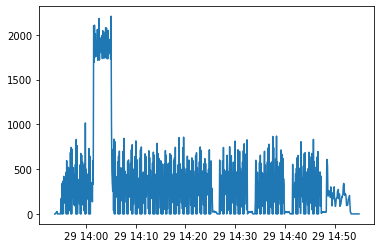

In [89]:
# Delicado
plt.plot(Delicado['Time'], Delicado['Prms_W'])
plt.show()

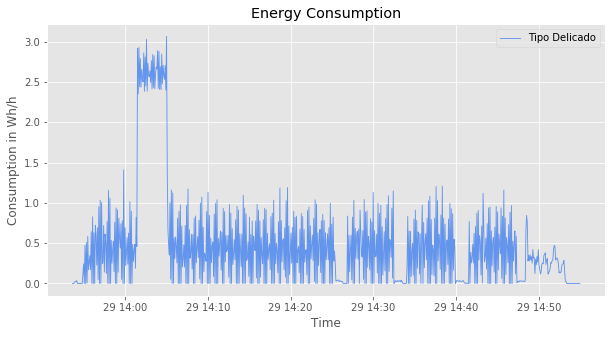

In [92]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(Delicado['Time'][0:6*24*7], Delicado['Energy_Wh'][0:6*24*7], linewidth=0.9, color= 'cornflowerblue')
plt.title('Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Consumption in Wh/h')
plt.legend(['Tipo Delicado'])
#plt.savefig('./images/V52_Plot.png', dpi=300)
plt.show()

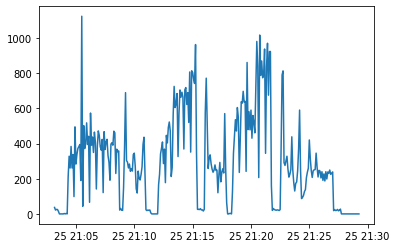

In [86]:
# Rapido
plt.plot(Rapido['Time'], Rapido['Prms_W'])
plt.show()

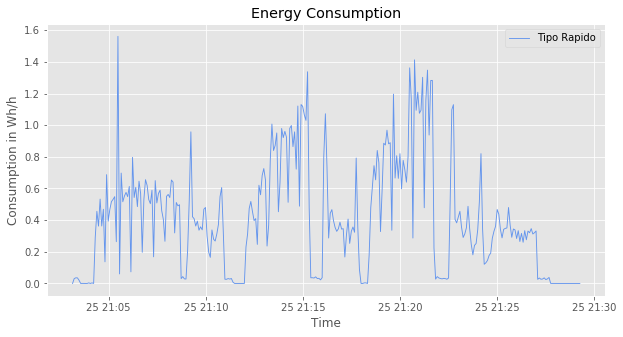

In [93]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(Rapido['Time'][0:6*24*7], Rapido['Energy_Wh'][0:6*24*7], linewidth=0.9, color= 'cornflowerblue')
plt.title('Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Consumption in Wh/h')
plt.legend(['Tipo Rapido'])
#plt.savefig('./images/V52_Plot.png', dpi=300)
plt.show()

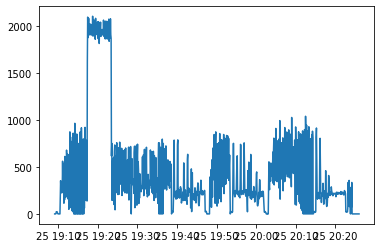

In [87]:
# Eco
plt.plot(Eco['Time'], Eco['Prms_W'])
plt.show()

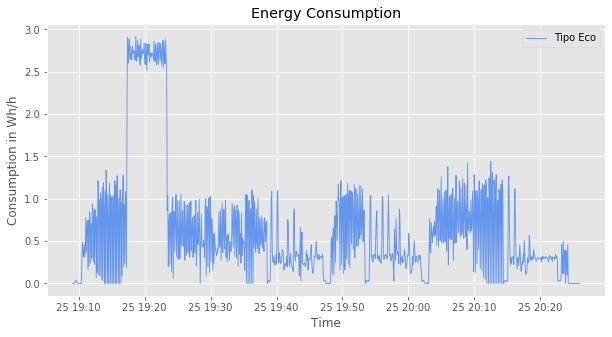

In [94]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(Eco['Time'][0:6*24*7], Eco['Energy_Wh'][0:6*24*7], linewidth=0.9, color= 'cornflowerblue')
plt.title('Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Consumption in Wh/h')
plt.legend(['Tipo Eco'])
#plt.savefig('./images/V52_Plot.png', dpi=300)
plt.show()

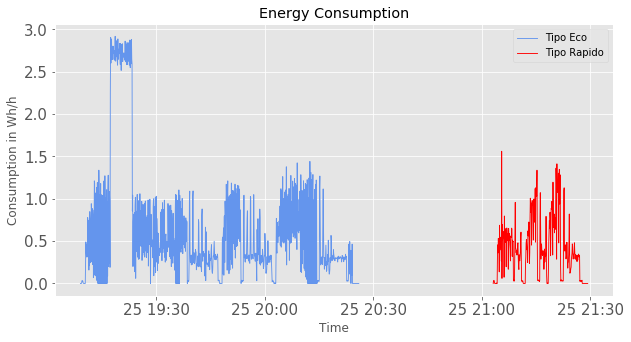

In [252]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(Eco['Time'][0:6*24*7], Eco['Energy_Wh'][0:6*24*7], linewidth=0.9, color= 'cornflowerblue')
plt.plot(Rapido['Time'][0:6*24*7], Rapido['Energy_Wh'][0:6*24*7], linewidth=0.9, color= 'red')
plt.title('Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Consumption in Wh/h')

plt.legend(['Tipo Eco','Tipo Rapido'])

#plt.savefig('./images/V52_Plot.png', dpi=300)
plt.show()

# REE API

### 25 de Julio

In [132]:
# import request library (by Python developers)
import requests 

# introduce the REE API URL
URL = 'https://api.esios.ree.es';
GET = '/archives_json';
HEADERS = {'Accept' : 'application/json',
           'Host' : 'api.esios.ree.es',
           'Authorization' : 'Token token=\"0704ee44821a0819bdbf62d0a9c2165d92099b8ce0b4c4a34a4d165bb64fd6b7"'
          }
PARAMS = {'date':'20200725'}

r = requests.get(url = URL+GET , headers = HEADERS, params = PARAMS ) 

In [133]:
print(r.status_code)

200


In [134]:
print(r.json())

{'archives': [{'id': 170, 'name': 'IND_CoeficientesCO2', 'description': 'IND_CoeficientesCO2', 'horizon': 'NA', 'archive_type': 'json', 'json_download': {'name': 'IND_CoeficientesCO2', 'type': 'JSON', 'url': '/archives/170/download_json?locale=es'}, 'taxonomy_terms': [], 'vocabularies': [{'id_vocabulary': 20, 'name': 'Universo'}, {'id_vocabulary': 21, 'name': 'Temática'}, {'id_vocabulary': 22, 'name': 'Área'}]}, {'id': 169, 'name': 'IND_EnergiaAnualNacional', 'description': 'IND_EnergiaAnualNacional', 'horizon': 'A', 'archive_type': 'json', 'json_download': {'name': 'IND_EnergiaAnualNacional', 'type': 'JSON', 'url': '/archives/169/download_json?locale=es'}, 'taxonomy_terms': [], 'vocabularies': [{'id_vocabulary': 20, 'name': 'Universo'}, {'id_vocabulary': 21, 'name': 'Temática'}, {'id_vocabulary': 22, 'name': 'Área'}]}, {'id': 168, 'name': 'IND_EnergiaMensualNacional', 'description': 'IND_EnergiaMensualNacional', 'horizon': 'M', 'archive_type': 'json', 'json_download': {'name': 'IND_En

In [135]:
""" Method to check if the json contains 'archives' information and return 
a array with all the data """        
def getArrayOfArchives(jsonData):
    # Check the elements in the json
    for element in jsonData:
        # If there is an element called 'archives', return the element. 
        # Otherwise, return amb empty array
        if element == 'archives':
            return jsonData[element]
    return []

In [136]:
data = r.json()
# Use a method to extract from the json the data of the archives
listOfArchives = getArrayOfArchives(data)
# For each archive of the list of all the archives, read ID and Name
for archive in listOfArchives:
    print("ID " + str(archive['id']) + " : " + archive['name'])

ID 170 : IND_CoeficientesCO2
ID 169 : IND_EnergiaAnualNacional
ID 168 : IND_EnergiaMensualNacional
ID 167 : IND_PotenciaInstaladaNacional
ID 140 : IND_EnergiaAnual
ID 139 : IND_EnergiaMensual
ID 117 : IND_MaxMinRenovEol
ID 116 : IND_MaxMin
ID 115 : IND_DemandaRealGen
ID 114 : IND_DemandaPrevProg
ID 113 : EntitledParticipants
ID 112 : BalanceResponsibleParties
ID 111 : ProgrammingUnits
ID 110 : GenerationUnits
ID 84 : ParticipantesSubasta
ID 83 : SujetosMercado
ID 82 : UnidadesProgramacion
ID 81 : UnidadesFisicas
ID 77 : PVPC_VHC_P3_DD
ID 76 : PVPC_VHC_P2_DD
ID 75 : PVPC_VHC_P1_DD
ID 74 : PVPC_NOC_P2_DD
ID 73 : PVPC_NOC_P1_DD
ID 72 : PVPC_GEN_P1_DD
ID 70 : PVPC_CURV_DD
ID 67 : IND_Umbrales
ID 66 : IND_PrecioFinal
ID 65 : IND_PrecioDesvios
ID 64 : IND_PotenciaInstalada
ID 63 : IND_Interconexiones
ID 62 : IND_DemandaInterrumpible


In [137]:
for archive in listOfArchives:
    if archive['id'] is 66:
        GET2 = archive['json_download']['url']

In [138]:
r = requests.get(url = URL+GET2 , headers = HEADERS, params = PARAMS ) 

In [139]:
print(r.json())

{'PrecioFinal': [{'Dia': '25/07/2020', 'Hora': '00-01', 'GEN': '93,79', 'NOC': '45,69', 'VHC': '48,59', 'COF': '0,000113483791000000', 'BOEGEN': '51,42', 'BOENOC': '4,89', 'BOEVHC': '6,02', 'PMHGEN': '40,95', 'PMHNOC': '39,43', 'PMHVHC': '41,16', 'SAHGEN': '1,41', 'SAHNOC': '1,36', 'SAHVHC': '1,42'}, {'Dia': '25/07/2020', 'Hora': '01-02', 'GEN': '89,20', 'NOC': '41,24', 'VHC': '38,77', 'COF': '0,000096654386000000', 'BOEGEN': '51,36', 'BOENOC': '4,83', 'BOEVHC': '3,25', 'PMHGEN': '36,21', 'PMHNOC': '34,83', 'PMHVHC': '33,98', 'SAHGEN': '1,64', 'SAHNOC': '1,58', 'SAHVHC': '1,54'}, {'Dia': '25/07/2020', 'Hora': '02-03', 'GEN': '87,24', 'NOC': '39,35', 'VHC': '36,93', 'COF': '0,000084832364000000', 'BOEGEN': '51,33', 'BOENOC': '4,80', 'BOEVHC': '3,22', 'PMHGEN': '33,96', 'PMHNOC': '32,67', 'PMHVHC': '31,87', 'SAHGEN': '1,95', 'SAHNOC': '1,88', 'SAHVHC': '1,83'}, {'Dia': '25/07/2020', 'Hora': '03-04', 'GEN': '92,57', 'NOC': '44,47', 'VHC': '41,89', 'COF': '0,000078006617000000', 'BOEGEN': 

In [179]:
# Price PVPC 2.0 without DHA
prices25 = []

In [180]:
# Price PVPC 2.0 without DHA
for archive in r.json()['PrecioFinal']:
    prices25.append(float(archive['GEN'].replace(',','.')))
    print(f"Price at {archive['Hora']} is {archive['GEN']} €/MWh")

Price at 00-01 is 93,79 €/MWh
Price at 01-02 is 89,20 €/MWh
Price at 02-03 is 87,24 €/MWh
Price at 03-04 is 92,57 €/MWh
Price at 04-05 is 94,12 €/MWh
Price at 05-06 is 97,07 €/MWh
Price at 06-07 is 94,48 €/MWh
Price at 07-08 is 95,00 €/MWh
Price at 08-09 is 97,49 €/MWh
Price at 09-10 is 97,60 €/MWh
Price at 10-11 is 94,90 €/MWh
Price at 11-12 is 94,49 €/MWh
Price at 12-13 is 94,47 €/MWh
Price at 13-14 is 95,70 €/MWh
Price at 14-15 is 92,82 €/MWh
Price at 15-16 is 87,52 €/MWh
Price at 16-17 is 85,67 €/MWh
Price at 17-18 is 85,38 €/MWh
Price at 18-19 is 86,15 €/MWh
Price at 19-20 is 89,38 €/MWh
Price at 20-21 is 90,24 €/MWh
Price at 21-22 is 91,85 €/MWh
Price at 22-23 is 92,18 €/MWh
Price at 23-24 is 88,71 €/MWh


In [181]:
prices25

[93.79,
 89.2,
 87.24,
 92.57,
 94.12,
 97.07,
 94.48,
 95.0,
 97.49,
 97.6,
 94.9,
 94.49,
 94.47,
 95.7,
 92.82,
 87.52,
 85.67,
 85.38,
 86.15,
 89.38,
 90.24,
 91.85,
 92.18,
 88.71]

In [182]:
# Price 2.0 DHA
pricesDha25 = []

In [183]:
# Price 2.0 DHA
for archive in r.json()['PrecioFinal']:
    pricesDha25.append(float(archive['NOC'].replace(',','.')))
    print(f"Price at {archive['Hora']} is {archive['NOC']} €/MWh")

Price at 00-01 is 45,69 €/MWh
Price at 01-02 is 41,24 €/MWh
Price at 02-03 is 39,35 €/MWh
Price at 03-04 is 44,47 €/MWh
Price at 04-05 is 45,97 €/MWh
Price at 05-06 is 48,85 €/MWh
Price at 06-07 is 46,37 €/MWh
Price at 07-08 is 46,86 €/MWh
Price at 08-09 is 49,57 €/MWh
Price at 09-10 is 49,83 €/MWh
Price at 10-11 is 47,27 €/MWh
Price at 11-12 is 46,91 €/MWh
Price at 12-13 is 46,85 €/MWh
Price at 13-14 is 114,21 €/MWh
Price at 14-15 is 111,36 €/MWh
Price at 15-16 is 106,01 €/MWh
Price at 16-17 is 104,11 €/MWh
Price at 17-18 is 103,86 €/MWh
Price at 18-19 is 104,63 €/MWh
Price at 19-20 is 107,89 €/MWh
Price at 20-21 is 108,75 €/MWh
Price at 21-22 is 110,38 €/MWh
Price at 22-23 is 110,70 €/MWh
Price at 23-24 is 40,88 €/MWh


In [184]:
pricesDha25

[45.69,
 41.24,
 39.35,
 44.47,
 45.97,
 48.85,
 46.37,
 46.86,
 49.57,
 49.83,
 47.27,
 46.91,
 46.85,
 114.21,
 111.36,
 106.01,
 104.11,
 103.86,
 104.63,
 107.89,
 108.75,
 110.38,
 110.7,
 40.88]

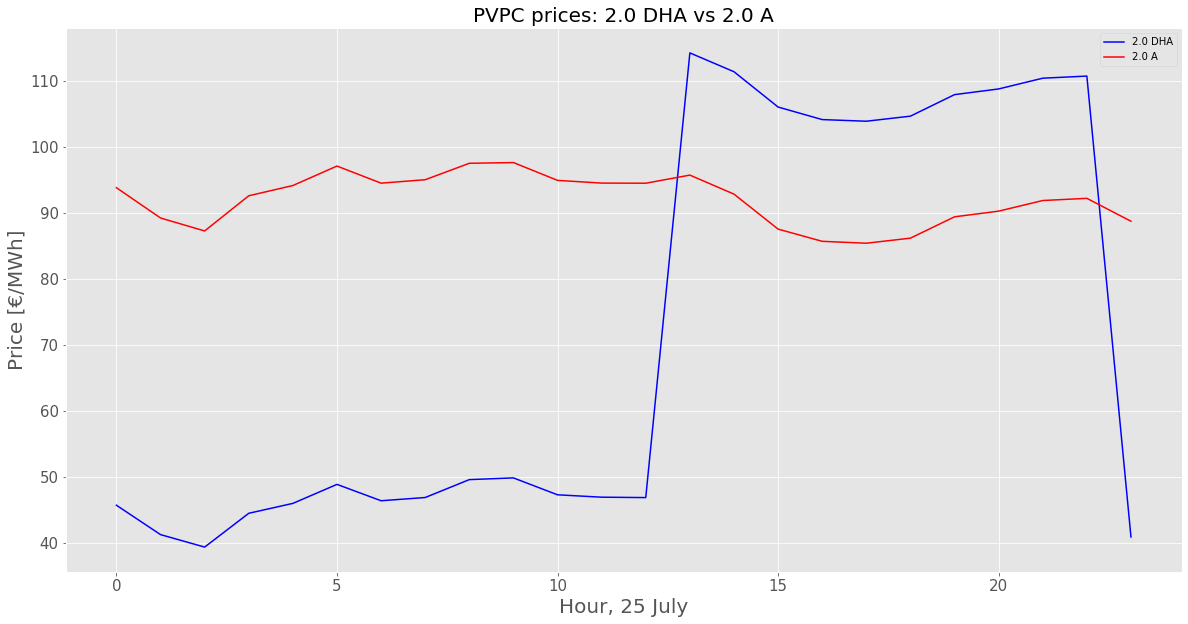

In [259]:
matplotlib.rc('xtick', labelsize=15)     
matplotlib.rc('ytick', labelsize=15)

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(pricesDha25,'b',linewidth=1.5)
plt.plot(prices25,'r',linewidth=1.5)
plt.title(f"PVPC prices: 2.0 DHA vs 2.0 A", fontsize=20)
plt.xlabel('Hour, 25 July',fontsize=20 )
plt.ylabel('Price [€/MWh]',fontsize=20)
plt.legend(['2.0 DHA', '2.0 A'])
plt.show()

### 29 de Julio

In [185]:
# import request library (by Python developers)
import requests 

# introduce the REE API URL
URL = 'https://api.esios.ree.es';
GET = '/archives_json';
HEADERS = {'Accept' : 'application/json',
           'Host' : 'api.esios.ree.es',
           'Authorization' : 'Token token=\"0704ee44821a0819bdbf62d0a9c2165d92099b8ce0b4c4a34a4d165bb64fd6b7"'
          }
PARAMS = {'date':'20200729'}

r = requests.get(url = URL+GET , headers = HEADERS, params = PARAMS ) 


""" Method to check if the json contains 'archives' information and return 
a array with all the data """        
def getArrayOfArchives(jsonData):
    # Check the elements in the json
    for element in jsonData:
        # If there is an element called 'archives', return the element. 
        # Otherwise, return amb empty array
        if element == 'archives':
            return jsonData[element]
    return []

data = r.json()
# Use a method to extract from the json the data of the archives
listOfArchives = getArrayOfArchives(data)
# For each archive of the list of all the archives, read ID and Name
for archive in listOfArchives:
    print("ID " + str(archive['id']) + " : " + archive['name'])
    
    
for archive in listOfArchives:
    if archive['id'] is 66:
        GET2 = archive['json_download']['url']
        
r = requests.get(url = URL+GET2 , headers = HEADERS, params = PARAMS ) 

ID 170 : IND_CoeficientesCO2
ID 169 : IND_EnergiaAnualNacional
ID 168 : IND_EnergiaMensualNacional
ID 167 : IND_PotenciaInstaladaNacional
ID 140 : IND_EnergiaAnual
ID 139 : IND_EnergiaMensual
ID 117 : IND_MaxMinRenovEol
ID 116 : IND_MaxMin
ID 115 : IND_DemandaRealGen
ID 114 : IND_DemandaPrevProg
ID 113 : EntitledParticipants
ID 112 : BalanceResponsibleParties
ID 111 : ProgrammingUnits
ID 110 : GenerationUnits
ID 84 : ParticipantesSubasta
ID 83 : SujetosMercado
ID 82 : UnidadesProgramacion
ID 81 : UnidadesFisicas
ID 77 : PVPC_VHC_P3_DD
ID 76 : PVPC_VHC_P2_DD
ID 75 : PVPC_VHC_P1_DD
ID 74 : PVPC_NOC_P2_DD
ID 73 : PVPC_NOC_P1_DD
ID 72 : PVPC_GEN_P1_DD
ID 70 : PVPC_CURV_DD
ID 67 : IND_Umbrales
ID 66 : IND_PrecioFinal
ID 65 : IND_PrecioDesvios
ID 64 : IND_PotenciaInstalada
ID 63 : IND_Interconexiones
ID 62 : IND_DemandaInterrumpible


In [186]:
# Price PVPC 2.0 without DHA
prices29 = []
for archive in r.json()['PrecioFinal']:
    prices29.append(float(archive['GEN'].replace(',','.')))
    print(f"Price at {archive['Hora']} is {archive['GEN']} €/MWh")
    
prices29

Price at 00-01 is 92,29 €/MWh
Price at 01-02 is 86,65 €/MWh
Price at 02-03 is 86,53 €/MWh
Price at 03-04 is 86,66 €/MWh
Price at 04-05 is 86,26 €/MWh
Price at 05-06 is 86,53 €/MWh
Price at 06-07 is 89,35 €/MWh
Price at 07-08 is 97,10 €/MWh
Price at 08-09 is 97,24 €/MWh
Price at 09-10 is 97,57 €/MWh
Price at 10-11 is 97,86 €/MWh
Price at 11-12 is 98,80 €/MWh
Price at 12-13 is 99,12 €/MWh
Price at 13-14 is 99,27 €/MWh
Price at 14-15 is 98,65 €/MWh
Price at 15-16 is 98,01 €/MWh
Price at 16-17 is 97,87 €/MWh
Price at 17-18 is 98,48 €/MWh
Price at 18-19 is 99,56 €/MWh
Price at 19-20 is 101,41 €/MWh
Price at 20-21 is 101,60 €/MWh
Price at 21-22 is 101,23 €/MWh
Price at 22-23 is 103,11 €/MWh
Price at 23-24 is 100,69 €/MWh


[92.29,
 86.65,
 86.53,
 86.66,
 86.26,
 86.53,
 89.35,
 97.1,
 97.24,
 97.57,
 97.86,
 98.8,
 99.12,
 99.27,
 98.65,
 98.01,
 97.87,
 98.48,
 99.56,
 101.41,
 101.6,
 101.23,
 103.11,
 100.69]

In [188]:
# Price 2.0 DHA
pricesDha29 = []
for archive in r.json()['PrecioFinal']:
    pricesDha29.append(float(archive['NOC'].replace(',','.')))
    print(f"Price at {archive['Hora']} is {archive['NOC']} €/MWh")
    
pricesDha29

Price at 00-01 is 44,35 €/MWh
Price at 01-02 is 38,87 €/MWh
Price at 02-03 is 38,78 €/MWh
Price at 03-04 is 38,87 €/MWh
Price at 04-05 is 38,49 €/MWh
Price at 05-06 is 38,82 €/MWh
Price at 06-07 is 41,64 €/MWh
Price at 07-08 is 49,19 €/MWh
Price at 08-09 is 49,75 €/MWh
Price at 09-10 is 50,13 €/MWh
Price at 10-11 is 50,41 €/MWh
Price at 11-12 is 51,37 €/MWh
Price at 12-13 is 51,59 €/MWh
Price at 13-14 is 117,76 €/MWh
Price at 14-15 is 117,14 €/MWh
Price at 15-16 is 116,54 €/MWh
Price at 16-17 is 116,35 €/MWh
Price at 17-18 is 116,97 €/MWh
Price at 18-19 is 118,05 €/MWh
Price at 19-20 is 119,97 €/MWh
Price at 20-21 is 120,15 €/MWh
Price at 21-22 is 119,77 €/MWh
Price at 22-23 is 121,67 €/MWh
Price at 23-24 is 52,71 €/MWh


[44.35,
 38.87,
 38.78,
 38.87,
 38.49,
 38.82,
 41.64,
 49.19,
 49.75,
 50.13,
 50.41,
 51.37,
 51.59,
 117.76,
 117.14,
 116.54,
 116.35,
 116.97,
 118.05,
 119.97,
 120.15,
 119.77,
 121.67,
 52.71]

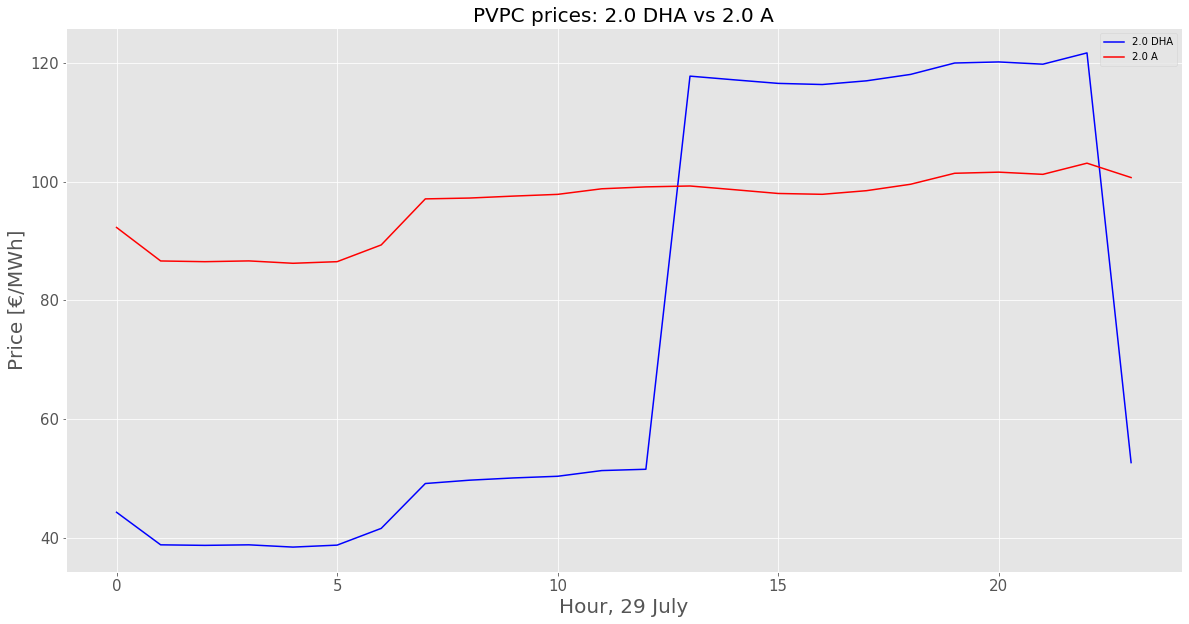

In [265]:
matplotlib.rc('xtick', labelsize=15)     
matplotlib.rc('ytick', labelsize=15)

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(pricesDha29,'b',linewidth=1.5)
plt.plot(prices29,'r',linewidth=1.5)
plt.title(f"PVPC prices: 2.0 DHA vs 2.0 A", fontsize=20)
plt.xlabel('Hour, 29 July',fontsize=20 )
plt.ylabel('Price [€/MWh]',fontsize=20)
plt.legend(['2.0 DHA', '2.0 A'])
plt.show()

In [303]:
# Cost calculation ECO
p1 = 0
p2 = 0
for x in range(0,613):
    p1 += 0.001 * Eco['Energy_Wh'][x]
for x in range(613,922):
    p2 += 0.001 * Eco['Energy_Wh'][x]
        
print(p1,p2, p1+p2, ' ', 'Total cost is', (p1*0.08938 + p2*0.09024),'Euros')

0.4643218333333334 0.142357463888889 0.6066792972222224   Total cost is 0.05434742300466668 Euros


In [307]:
# Cost calculation DELICADO
p1 = 0
p2 = 0
for x in range(0,78):
    p1 += 0.001 * Delicado['Energy_Wh'][x]
for x in range(78,734):
    p2 += 0.001 * Delicado['Energy_Wh'][x]
        
print(p1,p2, p1+p2, ' ', 'Total cost is', (p1*0.09927 + p2*0.09865),'Euros')

0.026275638888888897 0.3384026388888892 0.3646782777777781   Total cost is 0.03599180299888892 Euros


In [306]:
# Cost calculation RAPIDO
p = 0.11038 * 0.001 * Rapido['Energy_Wh'].sum(axis = 0)
print('Total cost is', p, 'Euros')

Total cost is 0.01433398175366667 Euros
